# Importation des données :

In [1]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 5.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import pandas as pd
import requests
import numpy as np 
from scipy import stats

In [3]:
OECD = pd.read_excel('données/OECD - short term economic indicators.xlsx')

In [4]:
IMF = pd.read_excel('données/IMF - monetary policy.xlsx')

In [5]:
agregated_data=pd.ExcelFile('données/FRBNY-SCE-Data.xlsx')
agregated_anticipation= df1=pd.read_excel(agregated_data, 'Inflation expectations')

In [6]:
agrant = agregated_anticipation[['Unnamed: 1','Unnamed: 2']].drop([0,1,2]).reset_index().rename(columns={'index':'date','Unnamed: 1':'short exp','Unnamed: 2':'mid exp'})

In [7]:
Enq13 = pd.read_excel('https://www.newyorkfed.org/medialibrary/interactives/sce/sce/downloads/data/frbny-sce-public-microdata-complete-13-16.xlsx')

In [8]:
Enq17 = pd.read_excel('https://www.newyorkfed.org/medialibrary/interactives/sce/sce/downloads/data/frbny-sce-public-microdata-complete-17-19.xlsx')

In [9]:
Latest=pd.ExcelFile('https://www.newyorkfed.org/medialibrary/Interactives/sce/sce/downloads/data/frbny-sce-public-microdata-latest.xlsx')
Enq20=pd.read_excel(Latest, 'Data')

In [10]:
Enq20

,"Source: Survey of Consumer Expectations, © 2013-22 Federal Reserve Bank of New York (FRBNY). The SCE data are available without charge at www.newyorkfed.org and may be used subject to license terms posted there. FRBNY disclaims any responsibility or legal liability for this analysis and interpretation of Survey of Consumer Expectations data.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219
0,date,userid,tenure,weight,Q1,Q2,Q3,Q4new,Q5new,Q6new,...,Q48,QRA1,QRA2,survey_date,_AGE_CAT,_NUM_CAT,_REGION_CAT,_COMMUTING_ZONE,_EDU_CAT,_HH_INC_CAT
1,202001,70103231,12,0.81825,4,3,20,62,26,44,...,5,NaN,NaN,2020-01-23 00:00:00,40 to 60,High,West,218,College,Over 100k
2,202001,70103252,11,2.879998,3,2,1,30,1,10,...,2,NaN,NaN,2020-01-02 00:00:00,40 to 60,Low,Northeast,203,High School,Under 50k
3,202001,70103258,12,0.549674,4,4,0,3,4,18,...,4,NaN,NaN,2020-01-07 00:00:00,Over 60,High,South,102,College,50k to 100k
4,202001,70103285,12,0.481746,4,4,10,10,10,10,...,1,NaN,NaN,2020-01-27 00:00:00,Under 40,High,Midwest,100,College,50k to 100k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37568,202206,75007151,1,1.235504,2,4,25,30,0,85,...,3,3,3,NaN,Under 40,High,South,35,NaN,Under 50k
37569,202206,75007154,1,0.725876,4,3,100,80,70,90,...,4,3,5,NaN,Under 40,High,West,297,College,Over 100k
37570,202206,75007155,1,1.521025,2,1,1,50,99,50,...,2,1,1,NaN,Over 60,Low,South,160,Some College,Under 50k
37571,202206,75007158,1,0.524731,3,3,0,50,0,0,...,3,3,2,NaN,40 to 60,High,West,171,College,50k to 100k


In [11]:
#Il faut faire 2-3 manips pour rendre les bases utilisables
new_columns = Enq13.iloc[0]
Enq13.columns = new_columns
Enq13 = Enq13.drop(0)

new_columns = Enq17.iloc[0]
Enq17.columns = new_columns
Enq17 = Enq17.drop(0)

In [12]:
new_columns = Enq20.iloc[0]
Enq20.columns = new_columns
Enq20 = Enq20.drop(0)

In [13]:
Enq17['date'] = pd.to_datetime(Enq17['date'].astype(str) + '01', format='%Y%m%d')
Enq13['date'] = pd.to_datetime(Enq13['date'].astype(str) + '01', format='%Y%m%d')
Enq20['date'] = pd.to_datetime(Enq20['date'].astype(str) + '01', format='%Y%m%d')

In [14]:
Base_finale=pd.concat([Enq13,Enq17,Enq20])

In [15]:
#Base_finale.to_excel('Base_finale.xlsx')

# I-Première spécification :

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [18]:
AA=Base_finale

In [19]:
list(AA.columns)

['date',
 'userid',
 'tenure',
 'weight',
 'Q1',
 'Q2',
 'Q3',
 'Q4new',
 'Q5new',
 'Q6new',
 'Q8v2',
 'Q8v2part2',
 'Q9_cent25',
 'Q9_cent50',
 'Q9_cent75',
 'Q9_var',
 'Q9_mean',
 'Q9_iqr',
 'Q9_probdeflation',
 'Q9_bin1',
 'Q9_bin2',
 'Q9_bin3',
 'Q9_bin4',
 'Q9_bin5',
 'Q9_bin6',
 'Q9_bin7',
 'Q9_bin8',
 'Q9_bin9',
 'Q9_bin10',
 'Q9bv2',
 'Q9bv2part2',
 'Q9c_cent25',
 'Q9c_cent50',
 'Q9c_cent75',
 'Q9c_var',
 'Q9c_mean',
 'Q9c_iqr',
 'Q9c_probdeflation',
 'Q9c_bin1',
 'Q9c_bin2',
 'Q9c_bin3',
 'Q9c_bin4',
 'Q9c_bin5',
 'Q9c_bin6',
 'Q9c_bin7',
 'Q9c_bin8',
 'Q9c_bin9',
 'Q9c_bin10',
 'Q10_1',
 'Q10_2',
 'Q10_3',
 'Q10_4',
 'Q10_5',
 'Q10_6',
 'Q10_7',
 'Q10_8',
 'Q10_9',
 'Q10_10',
 'Q11',
 'Q12new',
 'ES1_1',
 'ES1_2',
 'ES1_3',
 'ES1_4',
 'ES2',
 'ES3new',
 'ES4',
 'ES5',
 'Q13new',
 'Q14new',
 'Q15',
 'Q16',
 'Q17new',
 'Q18new',
 'Q19',
 'Q20new',
 'Q21new',
 'Q22new',
 'Q23v2',
 'Q23v2part2',
 'Q24_cent25',
 'Q24_cent50',
 'Q24_cent75',
 'Q24_var',
 'Q24_mean',
 'Q24_iqr',
 'Q

In [20]:
educ=pd.get_dummies(AA['_EDU_CAT'])

In [21]:
age=pd.get_dummies(AA['_AGE_CAT'])

In [22]:
income=pd.get_dummies(AA['_HH_INC_CAT'])

In [23]:
numeracy=pd.get_dummies(AA['_NUM_CAT'])

In [24]:
np.sum(educ['High School'])

16265

In [25]:
BC = pd.concat([AA, educ], axis=1).reindex(AA.index) #BC est pour Base complète. Ici, on complète la base avec des dummies

In [26]:
BC = pd.concat([BC, age], axis=1).reindex(BC.index)

In [27]:
BC = pd.concat([BC, income], axis=1).reindex(BC.index)

In [28]:
BC = pd.concat([BC, numeracy], axis=1).reindex(BC.index)

On code maintenant le genre :

In [29]:
%%capture
gender=pd.get_dummies(AA['Q33'])

In [30]:
gender.rename(columns={1: "fem"}, inplace=True)

In [31]:
BC = pd.concat([BC, gender['fem']], axis=1).reindex(BC.index)

C'est fait pour le genre. 

Faisons le ménage dans les non-réponses et dans les outliers :

In [32]:
BC=BC.dropna(subset=['Q8v2part2','Q9bv2part2']) #On supprime les personnes qui n'ont pas répondu aux questions sur les anticipations d'inflation. 

Supprimons les outliers

In [33]:
test=BC[BC['Q8v2part2']<=20]
test=test[test['Q8v2part2']>=-20]

In [34]:
max(test['Q8v2part2'])

20

In [35]:
model = OLS(BC['Q8v2part2'].astype('float'),BC['fem'].astype('float'))
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Q8v2part2   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              418.8
Date:                Sat, 22 Apr 2023   Prob (F-statistic):                    5.95e-93
Time:                        13:53:56   Log-Likelihood:                     -7.5224e+05
No. Observations:              140880   AIC:                                  1.504e+06
Df Residuals:                  140879   BIC:                                  1.504e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fem           10.6235      0.519     20.466      0.000       9.606      11.641
==============================================================================
Omnibus:                   680557.409   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    9377588790626.291
Skew:                         191.697   Prob(JB):                         0.00
Kurtosis:                   39970.461   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Calcul de l'inflation :

In [36]:
inflation_US = OECD[(OECD['Country'] == "United States") & (OECD['Subject2'] == "Consumer prices: all items")]
inflation_US2 = pd.DataFrame({
    'day': pd.to_datetime(inflation_US['Time'], format='%Y-%m-%d'),
    'Inflation': inflation_US['Value'].astype(float)
})

inflation_US3 = pd.DataFrame({
    'date': inflation_US2['day'],
    'tx_evol_ann_pct': (inflation_US2['Inflation'] / inflation_US2['Inflation'].shift(12) - 1) * 100
})


In [37]:
test['inflation t']=0

In [38]:
df3 = pd.merge(test,inflation_US3,how='outer',left_on=['date'],right_on=['date'])


In [39]:
df3=df3[df3['Q1'].notnull()]

In [40]:
BF=df3

## **ON LAISSE DE CÔTÉ LES INDICATEURS D'INSTABILITÉ, LEUR CONSTRUCTION EST TROP ARBITRAIRE ET PAS INTERPRÉTABLE**

## Définition d'un indicateur d'instabilité personelle :

On va définir les variables qu'il serait pertinent d'inclure : 
- Q3 : proba changement de résidence dans les douze prochain mois
- Q10 : 3 : chomeurs
- Q13new: proba de changer d'emploi
- Q25v2 : 3 : anticipe baisse de revenus
- Q30new : proba de ne pas réussir à payer un prêt



In [41]:
#BF.loc[BF['Q25v2']==3, 'loss expectation'] = 1 #On binarise le fait d'anticiper une baisse de ses revenus

In [42]:
#BF['indic_perso']=(BF.fillna(0)['Q3']/100+BF.fillna(0)['Q10_3']+BF.fillna(0)['Q13new']/100+BF.fillna(0)['loss expectation']+BF.fillna(0)['Q30new']/100)/5

*j'ai remplacé le 4 de la division par 5 pcq je crois qu'il y a 5 éléments, mais si c'est pas bien supprime ; dans tous les cas ça changera pas grand-chose à la régression puisque c'est proportionnel*

*par contre c'est pas un peu chaud de remplacer tous les nan par des 0?*

Faisons quelques statistiques descriptives dessus :

In [43]:
#import statistics as stat

In [44]:
#stat.median(BF['indic_perso'])

In [45]:
#stat.mean(BF['indic_perso'])

In [46]:
#def weighted_average(dataframe, value, weight):
    #val = dataframe[value]
    #wt = dataframe[weight]
    #return (val * wt).sum() / wt.sum()

In [47]:
#weighted_average(BF, 'indic_perso', 'weight')

In [48]:
#stat.pstdev(BF['indic_perso'])

In [49]:
#len(BF['Q8v2part2'])

In [50]:
#BF.dropna(subset=['weight'], inplace=True)

In [51]:
poids = BF['weight'].astype('float')

In [52]:
#Y = BF['Q8v2part2'].astype('float')
#X = BF.fillna(0)[['tx_evol_ann_pct','indic_perso']]
#X = sm.add_constant(X)
#model = sm.OLS(Y,X)
#results = model.fit()
#su = results.summary()
#su

### Alternative : on sépare les différents aspects de l'instabilité personnelle pour ne pas leur donner un poids arbitraire

In [53]:
#Allure proba de changement de résidence sous 12 mois
BF['Q3']

0          50
1          25
2           3
3           0
4          10
         ... 
130639      0
130640     11
130641     25
130642    100
130643      0
Name: Q3, Length: 130597, dtype: object

/opt/mamba/lib/python3.10/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/mamba/lib/python3.10/site-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


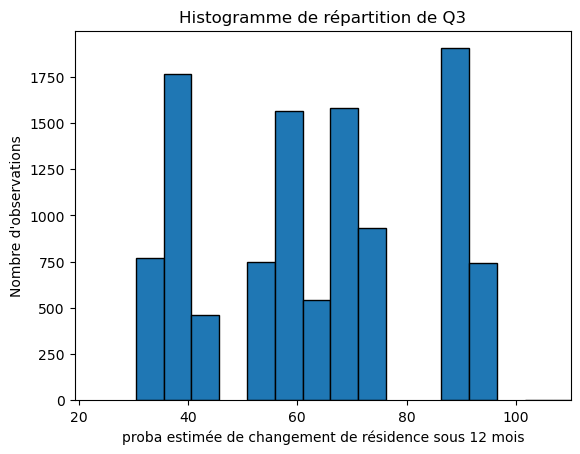

In [54]:
plt.hist(BF['Q3'], bins=50, edgecolor='black', weights = BF['weight'].astype(float))
plt.xlabel('proba estimée de changement de résidence sous 12 mois')
plt.ylabel('Nombre d\'observations')
plt.title('Histogramme de répartition de Q3')
plt.xlim(right=110)
plt.show()

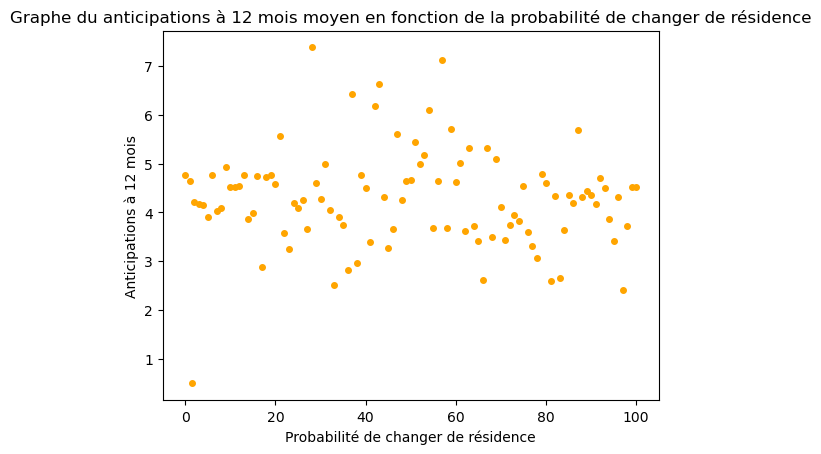

In [130]:
df = pd.DataFrame({'Q3': BF['Q3'], 'Q8v2part2': BF['Q8v2part2'], 'weight': BF['weight']})
df = df[df['Q3'] <= 110]
groups = df.groupby('Q3')
mean_q8v2part2 = groups.apply(lambda x: (x['Q8v2part2'] * x['weight']).sum() / x['weight'].sum())

plt.plot(mean_q8v2part2.index, mean_q8v2part2.values, 'o', markersize=4, color = 'orange')

plt.xlabel('Probabilité de changer de résidence')
plt.ylabel('Anticipations à 12 mois')
plt.title('Graphe du anticipations à 12 mois moyen en fonction de la probabilité de changer de résidence')
plt.show()

Alors on voit pas de relation linéaire du tout, mais on pense voir une dispersion plus grande aux alentours de 50 (donc les indécis)

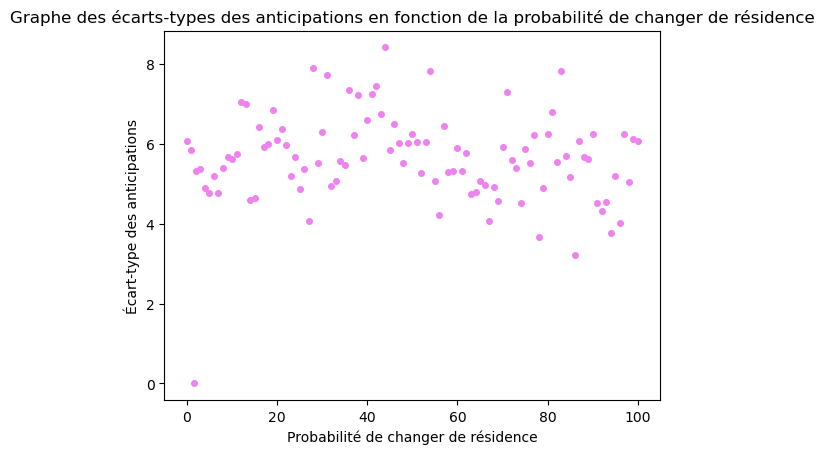

In [131]:
df = pd.DataFrame({'Q3': BF['Q3'], 'Q8v2part2': BF['Q8v2part2'], 'weight': BF['weight']})
df = df[df['Q3'] <= 110]
groups = df.groupby('Q3')

std_q8v2part2 = groups.apply(lambda x: np.sqrt(((x['Q8v2part2'] - x['Q8v2part2'].mean())**2 * x['weight']).sum() / x['weight'].sum()))

plt.plot(std_q8v2part2.index, std_q8v2part2.values, 'o', markersize=4, color='violet')
plt.xlabel('Probabilité de changer de résidence')
plt.ylabel('Écart-type des anticipations')
plt.title('Graphe des écarts-types des anticipations en fonction de la probabilité de changer de résidence')
plt.show()

C'est pas super net mais effectivement il semble ça joue un peu... il faudra faire attention sur les régressions : c'est l'écart à 50 qui compte (en tant que mesure d'indécision)

In [56]:
print("nb de valeurs manquantes dans Q3 : "+str(BF['Q3'].isnull().sum()))

nb de valeurs manquantes dans Q3 : 440


In [57]:
#Allure de l'indicatrice du chômage
BF['Q10_3']

0         0
1         0
2         0
3         0
4         0
         ..
130639    0
130640    0
130641    0
130642    0
130643    0
Name: Q10_3, Length: 130597, dtype: object

In [58]:
counts = BF['Q10_3'].value_counts()
print("Nombre d'actifs: ", counts[0])
print("Nombre de chômeurs: ", counts[1])

Nombre d'actifs:  126162
Nombre de chômeurs:  4435


In [134]:
BF_clean = BF.dropna(subset=['weight'])
print("AVEC POIDS")
print("Actifs: ", sum(BF_clean.loc[BF_clean['Q10_3'] == 0, 'weight']))
print("Chômeurs: ", sum(BF_clean.loc[BF_clean['Q10_3'] == 1, 'weight']))

AVEC POIDS
Actifs:  121256.31592203677
Chômeurs:  4659.482956960797


In [133]:
df = pd.DataFrame({'Q8v2part2': BF['Q8v2part2'], 'Q10_3': BF['Q10_3'], 'weight': BF['weight']})
df = df[df['Q10_3'] == 0]
mean_q8v2part2 = (df['Q8v2part2'] * df['weight']).sum() / df['weight'].sum()

print("La valeur moyenne des anticipations chez les individus qui ne sont pas au chômage est : ", mean_q8v2part2)

df = pd.DataFrame({'Q8v2part2': BF['Q8v2part2'], 'Q10_3': BF['Q10_3'], 'weight': BF['weight']})
df = df[df['Q10_3'] == 1]
mean_q8v2part2 = (df['Q8v2part2'] * df['weight']).sum() / df['weight'].sum()

print("La valeur moyenne des anticipations chez les individus qui sont au chômage est : ", mean_q8v2part2)

La valeur moyenne des anticipations chez les individus qui ne sont pas au chômage est :  4.496042411150647
La valeur moyenne des anticipations chez les individus qui sont au chômage est :  5.207286630988982


La différence est très importante

In [60]:
print("nb de valeurs manquantes dans Q10_3 : "+str(BF['Q10_3'].isnull().sum()))

nb de valeurs manquantes dans Q10_3 : 0


le chômage est tjrs renseigné, c'est cool

In [61]:
#Allure proba changer d'emploi
BF['Q13new']

0         NaN
1         NaN
2         NaN
3         NaN
4          30
         ... 
130639      6
130640     20
130641      0
130642      5
130643      0
Name: Q13new, Length: 130597, dtype: object

In [62]:
print("nb de valeurs manquantes dans Q13new : "+str(BF['Q13new'].isnull().sum()))

nb de valeurs manquantes dans Q13new : 53431


*c'est une catastrophe absolue, quasiment la moitié des participants n'y ont pas répondu...
il faudra sans doute faire une régression qui ne le prend pas en compte ;
je ne fais pas de stat descriptive dessus*

In [63]:
#Allure anticipation baisse revenus
BF['Q25v2']

0         3
1         1
2         1
3         1
4         3
         ..
130639    1
130640    1
130641    1
130642    1
130643    1
Name: Q25v2, Length: 130597, dtype: object

In [64]:
counts = BF['Q25v2'].value_counts()
print("Anticipation d'augmentation des revenus du ménage: ", counts[1])
print("Anticipation de diminution des revenus du ménage: ", counts[3])

Anticipation d'augmentation des revenus du ménage:  114036
Anticipation de diminution des revenus du ménage:  16501


In [65]:
BF_clean = BF.dropna(subset=['weight'])
print("AVEC POIDS")
print("Anticipation d'augmentation des revenus du ménage: ", sum(BF_clean.loc[BF_clean['Q25v2'] == 1, 'weight']))
print("Anticipation de diminution des revenus du ménage: ", sum(BF_clean.loc[BF_clean['Q25v2'] == 3, 'weight']))

AVEC POIDS
Anticipation d'augmentation des revenus du ménage:  109126.75136373937
Anticipation de diminution des revenus du ménage:  16718.225292161107


In [136]:
df = pd.DataFrame({'Q8v2part2': BF['Q8v2part2'], 'Q25v2': BF['Q25v2'], 'weight': BF['weight']})
df = df[df['Q25v2'] == 1]
mean_q8v2part2 = (df['Q8v2part2'] * df['weight']).sum() / df['weight'].sum()

print("Moyenne des anticipations chez les individus qui pensent que leurs revenus vont augmenter : ", mean_q8v2part2)

df = pd.DataFrame({'Q8v2part2': BF['Q8v2part2'], 'Q25v2': BF['Q25v2'], 'weight': BF['weight']})
df = df[df['Q25v2'] == 3]
mean_q8v2part2 = (df['Q8v2part2'] * df['weight']).sum() / df['weight'].sum()

print("Moyenne des anticipations chez les individus qui pensent que leurs revenus vont diminuer : ", mean_q8v2part2)

Moyenne des anticipations chez les individus qui pensent que leurs revenus vont augmenter :  4.441771370334867
Moyenne des anticipations chez les individus qui pensent que leurs revenus vont diminuer :  5.045072494283152


Ça marche bien

In [66]:
print("nb de valeurs manquantes dans Q25v2 : "+str(BF['Q25v2'].isnull().sum()))

nb de valeurs manquantes dans Q25v2 : 60


In [67]:
#Allure proba ne pas réussir à rembourser un prêt
BF['Q30new']

0         30
1          0
2         97
3          0
4          5
          ..
130639     2
130640    10
130641    60
130642    10
130643     0
Name: Q30new, Length: 130597, dtype: object

/opt/mamba/lib/python3.10/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/mamba/lib/python3.10/site-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


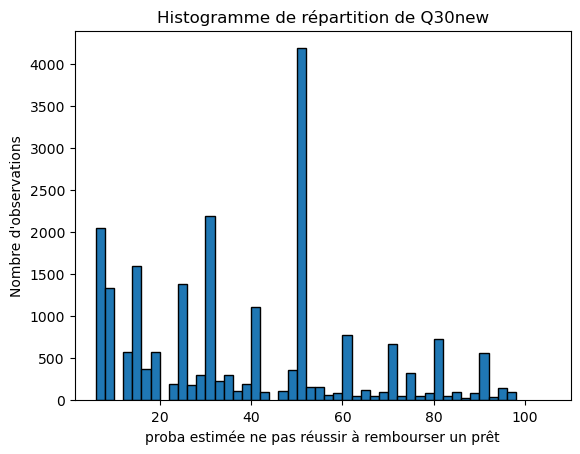

In [68]:
plt.hist(BF['Q30new'], bins=50, edgecolor='black', weights = BF['weight'].astype(float))
plt.xlabel('proba estimée ne pas réussir à rembourser un prêt')
plt.ylabel('Nombre d\'observations')
plt.title('Histogramme de répartition de Q30new')
plt.xlim(right=110)
plt.show()

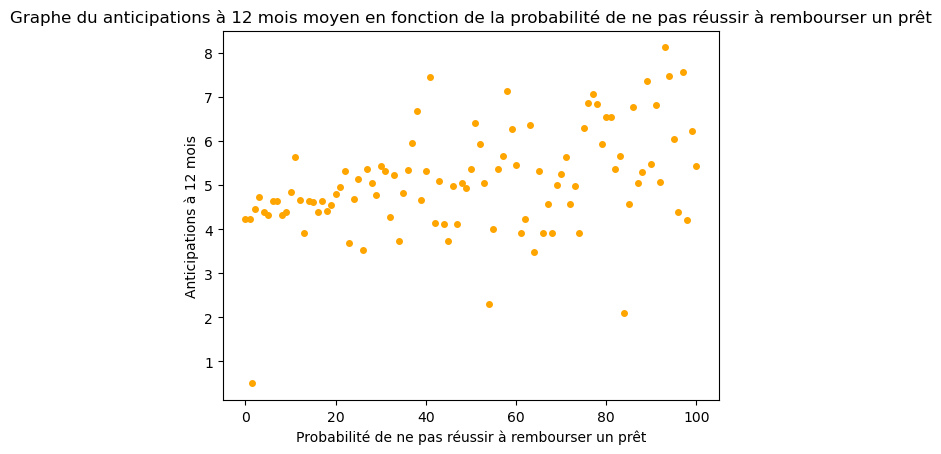

In [137]:
df = pd.DataFrame({'Q30new': BF['Q30new'], 'Q8v2part2': BF['Q8v2part2'], 'weight': BF['weight']})
df = df[df['Q30new'] <= 110]
groups = df.groupby('Q30new')
mean_q8v2part2 = groups.apply(lambda x: (x['Q8v2part2'] * x['weight']).sum() / x['weight'].sum())

plt.plot(mean_q8v2part2.index, mean_q8v2part2.values, 'o', markersize=4, color = 'orange')

plt.xlabel('Probabilité de ne pas réussir à rembourser un prêt')
plt.ylabel('Anticipations à 12 mois')
plt.title('Graphe du anticipations à 12 mois moyen en fonction de la probabilité de ne pas réussir à rembourser un prêt')
plt.show()

La relation est très nette. les écarts types semblent aussi bouger 

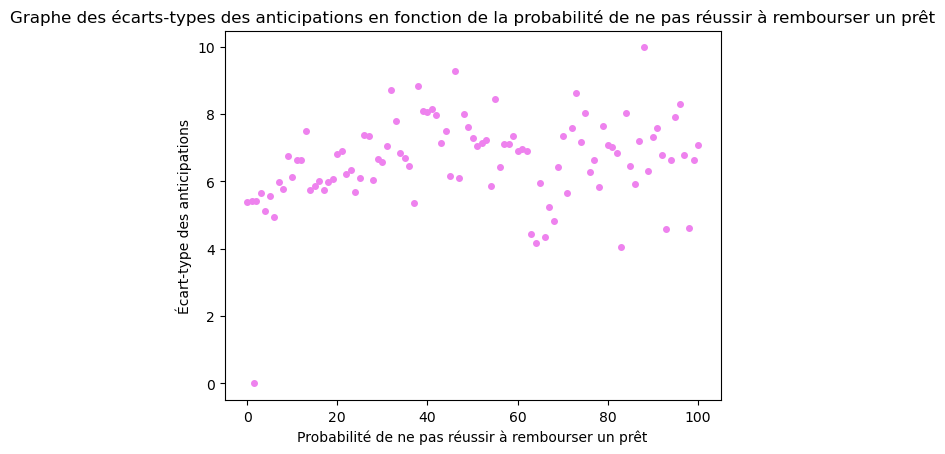

In [138]:
df = pd.DataFrame({'Q30new': BF['Q30new'], 'Q8v2part2': BF['Q8v2part2'], 'weight': BF['weight']})
df = df[df['Q30new'] <= 110]
groups = df.groupby('Q30new')

std_q8v2part2 = groups.apply(lambda x: np.sqrt(((x['Q8v2part2'] - x['Q8v2part2'].mean())**2 * x['weight']).sum() / x['weight'].sum()))

plt.plot(std_q8v2part2.index, std_q8v2part2.values, 'o', markersize=4, color='violet')
plt.xlabel('Probabilité de ne pas réussir à rembourser un prêt')
plt.ylabel('Écart-type des anticipations')
plt.title('Graphe des écarts-types des anticipations en fonction de la probabilité de ne pas réussir à rembourser un prêt')
plt.show()

mouais

In [69]:
print("nb de valeurs manquantes dans Q30new : "+str(BF['Q30new'].isnull().sum()))

nb de valeurs manquantes dans Q30new : 226


In [70]:
BF

,date,userid,tenure,weight,Q1,Q2,Q3,Q4new,Q5new,Q6new,...,Over 60,Under 40,50k to 100k,Over 100k,Under 50k,High,Low,fem,inflation t,tx_evol_ann_pct
0,2013-06-01,70000220,6,16.327999,3,3,50,20,10,15,...,False,True,False,False,True,True,False,True,0.0,1.754417
1,2013-06-01,70000224,7,0.228,4,4,25,10,25,75,...,True,False,False,True,False,True,False,False,0.0,1.754417
2,2013-06-01,70000234,6,4.066,4,3,3,9,20,20,...,False,False,False,True,False,True,False,True,0.0,1.754417
3,2013-06-01,70000238,6,3.035,3,3,0,10,5,70,...,True,False,False,False,True,False,True,False,0.0,1.754417
4,2013-06-01,70000239,7,1.947,2,3,10,20,20,50,...,True,False,False,False,True,False,True,True,0.0,1.754417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130639,2022-06-01,75007148,1,0.714652,3,2,0,22,100,10,...,False,True,True,False,False,False,True,True,0.0,9.059758
130640,2022-06-01,75007149,1,1.373903,1,1,11,0,0,30,...,False,False,False,False,True,True,False,False,0.0,9.059758
130641,2022-06-01,75007151,1,1.235504,2,4,25,30,0,85,...,False,True,False,False,True,True,False,False,0.0,9.059758
130642,2022-06-01,75007154,1,0.725876,4,3,100,80,70,90,...,False,True,False,True,False,True,False,False,0.0,9.059758


In [71]:
instabilité = ['Q3', 'Q10_3', 'Q13new', 'Q25v2', 'Q30new']

In [72]:
#on fabrique un dataframe sans les valeurs manquantes
BF2 = BF.dropna(subset=instabilité)

In [73]:
%%capture
#du coup on re binarise
BF2.loc[BF['Q25v2']==3, 'loss expectation'] = 1
BF2['loss expectation']=BF2.fillna(0)['loss expectation']

In [74]:
instabilité = ['Q3', 'Q10_3', 'Q13new', 'loss expectation', 'Q30new']

In [75]:
%%capture
#transformation des colonnes en float
for element in instabilité :
    BF2[element] = BF2[element].astype(float)

In [76]:
BF2 = BF2.rename(columns={'Q3': 'proba chgt résidence',
                          'Q10_3': 'chômage',
                          'Q13new': 'proba chgt emploi',
                          'loss expectation': 'proba perte revenus',
                          'Q30new': 'proba ne pas réussir à rembourser un prêt'})

In [77]:
BF2.dropna(subset=['weight'], inplace=True)

In [78]:
instabilité = ['proba chgt résidence',
               'chômage',
               'proba chgt emploi',
               'proba perte revenus',
               'proba ne pas réussir à rembourser un prêt']
poids = BF2['weight'].astype('float')

In [79]:
Y = BF2['Q8v2part2'].astype('float')
X = BF2[instabilité]
X = sm.add_constant(X)
model = sm.WLS(Y,X, weights=poids)
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              Q8v2part2   R-squared:                       0.004
Model:                            WLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     66.01
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           4.88e-69
Time:                        13:54:04   Log-Likelihood:            -2.4803e+05
No. Observations:               76984   AIC:                         4.961e+05
Df Residuals:                   76978   BIC:                         4.961e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         4.0289      0.028    143.529      0.000       3.974       4.084
proba chgt résidence                         -0.0043      0.001     -6.187      0.000      -0.006      -0.003
chômage                                      -1.3218      0.715     -1.849      0.064      -2.723       0.079
proba chgt emploi                             0.0050      0.001      4.679      0.000       0.003       0.007
proba perte revenus                           0.2372      0.071      3.346      0.001       0.098       0.376
proba ne pas réussir à rembourser un prêt     0.0148      0.001     14.982      0.000       0.013       0.017
==============================================================================
Omnibus:                    14900.471   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           427740.306
Skew:                           0.189   Prob(JB):                         0.00
Kurtosis:                      14.542   Cond. No.                     1.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Les coeff sont tous significatifs à 95%, mais très petits

## **IDEM ON LAISSE CET INDICATEUR DE CÔTÉ**

## Maintenant, essayons de définir un indicateur pour l'instabilité macro :

On va noter ici les variables qui pourraient être utiles pour définir un tel indicateur :
- Q4new: probabilité d'augmentation du chômage dans les douze prochain mois
- Q5new: proba d'une augmentation des taux d'intêret
- Q6new: proba d'une augmentation des indices boursiers: 100-Q6new = chance d'une baisse donc


In [80]:
#BF['indic_macro']=(BF.fillna(0)['Q4new']/100+BF.fillna(0)['Q5new']/100+(100-BF.fillna(0)['Q6new'])/100)/3

Maintenant, faisons quelques statistiques descriptives :

In [81]:
#stat.median(BF['indic_macro'])

In [82]:
#stat.mean(BF['indic_macro'])

In [83]:
#weighted_average(BF, 'indic_macro', 'weight')

In [84]:
#stat.pstdev(BF['indic_macro'])

In [85]:
#BF['indic_macro']

In [86]:
#Y = BF['Q8v2part2'].astype('float')
#X = BF.fillna(0)[['tx_evol_ann_pct','indic_perso','indic_macro']]
#X = sm.add_constant(X)
#model = sm.OLS(Y,X)
#results = model.fit()
#su = results.summary()
#su

### Idem, alternative sans bloc :

In [87]:
BF['Q4new']

0         20
1         10
2          9
3         10
4         20
          ..
130639    22
130640     0
130641    30
130642    80
130643    50
Name: Q4new, Length: 130597, dtype: object

/opt/mamba/lib/python3.10/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/mamba/lib/python3.10/site-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


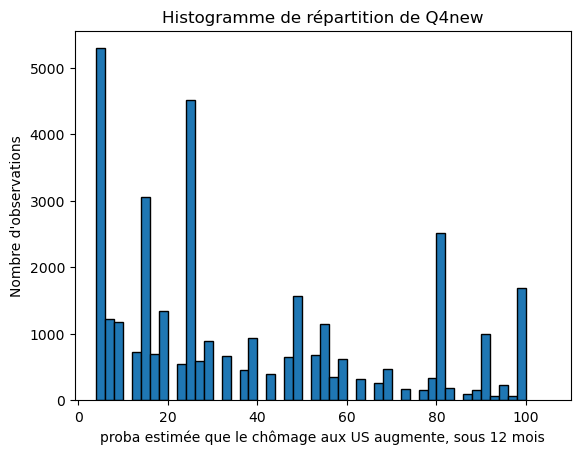

In [88]:
plt.hist(BF['Q4new'], bins=50, edgecolor='black', weights = BF['weight'].astype(float))
plt.xlabel('proba estimée que le chômage aux US augmente, sous 12 mois')
plt.ylabel('Nombre d\'observations')
plt.title('Histogramme de répartition de Q4new')
plt.xlim(right=110)
plt.show()

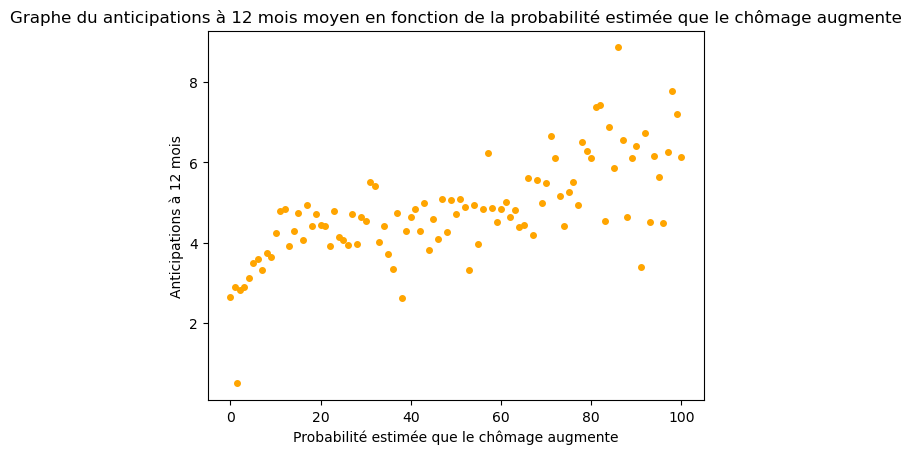

In [140]:
df = pd.DataFrame({'Q4new': BF['Q4new'], 'Q8v2part2': BF['Q8v2part2'], 'weight': BF['weight']})
df = df[df['Q4new'] <= 110]
groups = df.groupby('Q4new')
mean_q8v2part2 = groups.apply(lambda x: (x['Q8v2part2'] * x['weight']).sum() / x['weight'].sum())

plt.plot(mean_q8v2part2.index, mean_q8v2part2.values, 'o', markersize=4, color = 'orange')

plt.xlabel('Probabilité estimée que le chômage augmente')
plt.ylabel('Anticipations à 12 mois')
plt.title('Graphe du anticipations à 12 mois moyen en fonction de la probabilité estimée que le chômage augmente')
plt.show()

relation nette ; il semble y avoir un plateau entre 40 et 60 ; on peut zapper les écarts types je pense

In [89]:
print("nb de valeurs manquantes dans Q4new : "+str(BF['Q4new'].isnull().sum()))

nb de valeurs manquantes dans Q4new : 255


In [90]:
BF['Q5new']

0          10
1          25
2          20
3           5
4          20
         ... 
130639    100
130640      0
130641      0
130642     70
130643      0
Name: Q5new, Length: 130597, dtype: object

/opt/mamba/lib/python3.10/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/mamba/lib/python3.10/site-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


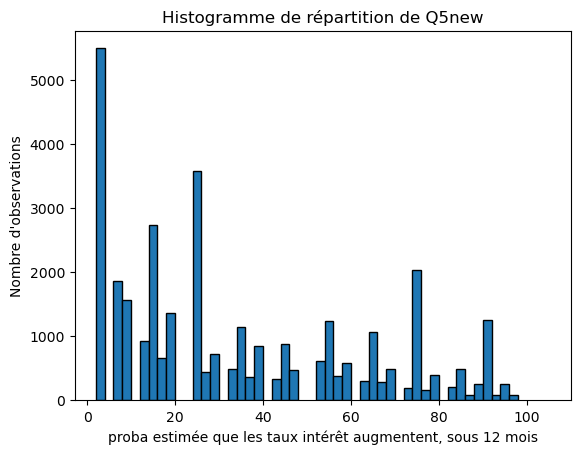

In [91]:
plt.hist(BF['Q5new'], bins=50, edgecolor='black', weights = BF['weight'].astype(float))
plt.xlabel('proba estimée que les taux intérêt augmentent, sous 12 mois')
plt.ylabel('Nombre d\'observations')
plt.title('Histogramme de répartition de Q5new')
plt.xlim(right=110)
plt.show()

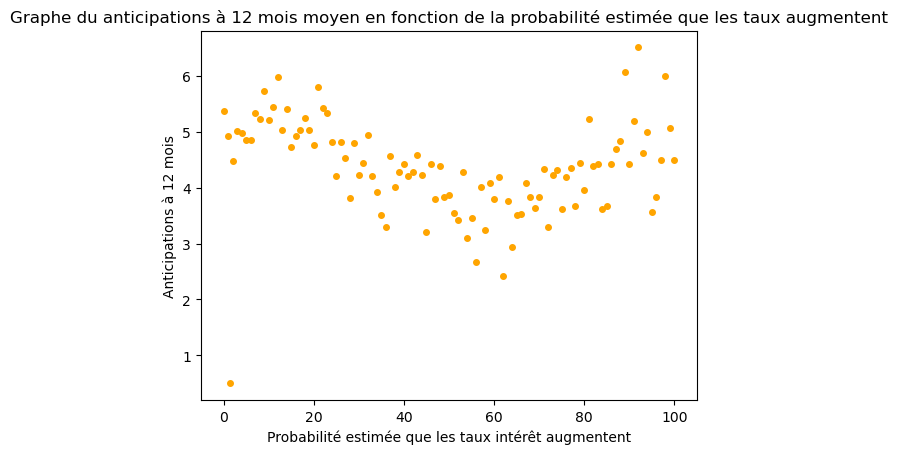

In [142]:
df = pd.DataFrame({'Q5new': BF['Q5new'], 'Q8v2part2': BF['Q8v2part2'], 'weight': BF['weight']})
df = df[df['Q5new'] <= 110]
groups = df.groupby('Q5new')
mean_q8v2part2 = groups.apply(lambda x: (x['Q8v2part2'] * x['weight']).sum() / x['weight'].sum())

plt.plot(mean_q8v2part2.index, mean_q8v2part2.values, 'o', markersize=4, color = 'orange')

plt.xlabel('Probabilité estimée que les taux intérêt augmentent')
plt.ylabel('Anticipations à 12 mois')
plt.title('Graphe du anticipations à 12 mois moyen en fonction de la probabilité estimée que les taux augmentent')
plt.show()

petit U en 60 -> il faudra intégrer cette allure à la régression

In [92]:
print("nb de valeurs manquantes dans Q5new : "+str(BF['Q5new'].isnull().sum()))

nb de valeurs manquantes dans Q5new : 241


In [93]:
BF['Q6new']

0         15
1         75
2         20
3         70
4         50
          ..
130639    10
130640    30
130641    85
130642    90
130643     0
Name: Q6new, Length: 130597, dtype: object

/opt/mamba/lib/python3.10/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/mamba/lib/python3.10/site-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


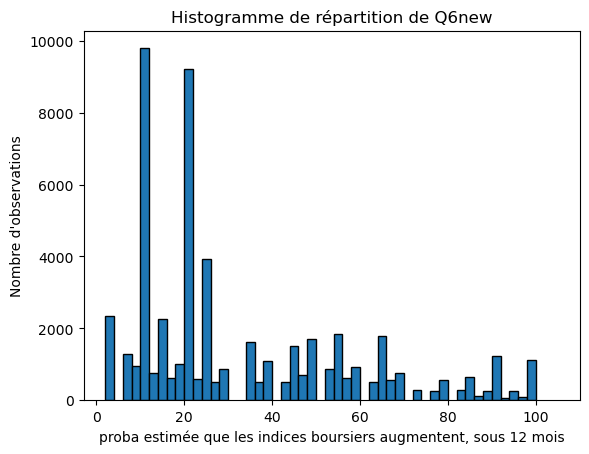

In [94]:
plt.hist(BF['Q6new'], bins=50, edgecolor='black', weights = BF['weight'].astype(float))
plt.xlabel('proba estimée que les indices boursiers augmentent, sous 12 mois')
plt.ylabel('Nombre d\'observations')
plt.title('Histogramme de répartition de Q6new')
plt.xlim(right=110)
plt.show()

In [ ]:
df = pd.DataFrame({'Q5new': BF['Q5new'], 'Q8v2part2': BF['Q8v2part2'], 'weight': BF['weight']})
df = df[df['Q5new'] <= 110]
groups = df.groupby('Q5new')
mean_q8v2part2 = groups.apply(lambda x: (x['Q8v2part2'] * x['weight']).sum() / x['weight'].sum())

plt.plot(mean_q8v2part2.index, mean_q8v2part2.values, 'o', markersize=4, color = 'orange')

plt.xlabel('Probabilité estimée que les taux intérêt augmentent')
plt.ylabel('Anticipations à 12 mois')
plt.title('Graphe du anticipations à 12 mois moyen en fonction de la probabilité estimée que les taux augmentent')
plt.show()

In [95]:
print("nb de valeurs manquantes dans Q6new : "+str(BF['Q6new'].isnull().sum()))

nb de valeurs manquantes dans Q6new : 810


Au total on va perdre pas mal de répondants, mais ça reste pas énorme

Se posera tout de même la question, si l'on envisage une grosse régression, du nombre d'individus qui auront répondu à tout ce qui nous intéresse ; d'ailleurs étudions ça avant de passer à la suite

In [96]:
len(BF[BF['Q3'].isna() | 
       BF['Q10_3'].isna()  |
       BF['Q13new'].isna() | 
       BF['Q25v2'].isna() | 
       BF['Q30new'].isna() | 
       BF['Q4new'].isna() | 
       BF['Q5new'].isna() | 
       BF['Q6new'].isna()])

53964

On perd la moitié des répondants. Tandis que sans la question de la proba de changer d'emploi :

In [97]:
len(BF[BF['Q3'].isna() |
       BF['Q10_3'].isna() |
       BF['Q25v2'].isna() |
       BF['Q30new'].isna() |
       BF['Q4new'].isna() | 
       BF['Q5new'].isna() |
       BF['Q6new'].isna()])

1179

Ce qui est beaucoup plus raisonnable. On l'exclura donc sans doute.

revenons à nos moutons

In [98]:
instabilité2 = ['Q4new', 'Q5new', 'Q6new']

In [99]:
#on fabrique un dataframe sans les valeurs manquantes
BF3 = BF.dropna(subset=instabilité2)

In [100]:
%%capture
#transformation des colonnes en float
for element in instabilité2 :
    BF3[element] = BF3[element].astype(float)

In [101]:
%%capture
#obtention d'une colonne proba diminution indices boursiers
BF3['Q6new_bis'] = 100-BF3['Q6new']

In [102]:
BF3 = BF3.rename(columns={'Q4new': 'proba augmentation chô sous douze mois',
                          'Q5new': 'proba augmentation tx intêret',
                          'Q6new_bis' : 'proba diminution indices boursiers'})

In [103]:
BF3.dropna(subset=['weight'], inplace=True)

In [104]:
instabilité2 = ['proba augmentation chô sous douze mois',
                'proba augmentation tx intêret',
                'proba diminution indices boursiers']
poids = BF3['weight'].astype('float')

In [105]:
Y = BF3['Q8v2part2'].astype('float')
X = BF3[instabilité2]
X = sm.add_constant(X)
model = sm.WLS(Y,X, weights=poids)
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              Q8v2part2   R-squared:                       0.028
Model:                            WLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1247.
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:54:08   Log-Likelihood:            -4.2351e+05
No. Observations:              129676   AIC:                         8.470e+05
Df Residuals:                  129672   BIC:                         8.471e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.3753      0.065     36.286      0.000       2.247       2.504
proba augmentation chô sous douze mois     0.0323      0.001     45.677      0.000       0.031       0.034
proba augmentation tx intêret             -0.0148      0.001    -20.854      0.000      -0.016      -0.013
proba diminution indices boursiers         0.0243      0.001     31.825      0.000       0.023       0.026
==============================================================================
Omnibus:                    23742.252   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           655670.849
Skew:                           0.018   Prob(JB):                         0.00
Kurtosis:                      14.016   Cond. No.                         321.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tous significatifs à 95%, mais coefficients ridicules

## Tentative de maxi régression

On va inclure tout sans bloc ; sans considérer la question qui fait perdre la moitié des répondants

In [106]:
instabilité_micro = ['Q3', 'Q10_3', 'Q25v2', 'Q30new']
instabilité_macro = ['Q4new', 'Q5new', 'Q6new']
régresseurs = instabilité_micro + instabilité_macro + ['tx_evol_ann_pct', 'fem']

In [107]:
#retrait des valeurs manquantes
BF4 = BF.dropna(subset=régresseurs)

In [108]:
BF4

,date,userid,tenure,weight,Q1,Q2,Q3,Q4new,Q5new,Q6new,...,Over 60,Under 40,50k to 100k,Over 100k,Under 50k,High,Low,fem,inflation t,tx_evol_ann_pct
0,2013-06-01,70000220,6,16.327999,3,3,50,20,10,15,...,False,True,False,False,True,True,False,True,0.0,1.754417
1,2013-06-01,70000224,7,0.228,4,4,25,10,25,75,...,True,False,False,True,False,True,False,False,0.0,1.754417
2,2013-06-01,70000234,6,4.066,4,3,3,9,20,20,...,False,False,False,True,False,True,False,True,0.0,1.754417
3,2013-06-01,70000238,6,3.035,3,3,0,10,5,70,...,True,False,False,False,True,False,True,False,0.0,1.754417
4,2013-06-01,70000239,7,1.947,2,3,10,20,20,50,...,True,False,False,False,True,False,True,True,0.0,1.754417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130639,2022-06-01,75007148,1,0.714652,3,2,0,22,100,10,...,False,True,True,False,False,False,True,True,0.0,9.059758
130640,2022-06-01,75007149,1,1.373903,1,1,11,0,0,30,...,False,False,False,False,True,True,False,False,0.0,9.059758
130641,2022-06-01,75007151,1,1.235504,2,4,25,30,0,85,...,False,True,False,False,True,True,False,False,0.0,9.059758
130642,2022-06-01,75007154,1,0.725876,4,3,100,80,70,90,...,False,True,False,True,False,True,False,False,0.0,9.059758


In [109]:
for i in régresseurs :
    print(BF4[i].count()/BF[i].count())

0.9943222416005286
0.9909722275396832
0.9914277178118082
0.9926900921217142
0.9929109573276458
0.9928043204762343
0.9971568801189642
0.9909722275396832
0.9909722275396832


In [110]:
%%capture
#du coup on re binarise Q25v2
BF4.loc[BF['Q25v2']==3, 'loss expectation'] = 1
BF4['loss expectation']=BF4.fillna(0)['loss expectation']

In [111]:
%%capture
#obtention d'une colonne proba diminution indices boursiers
BF4['Q6new_bis'] = 100-BF4['Q6new']
BF4['Q6new_bis'] = BF4['Q6new_bis'].astype(float)

In [112]:
%%capture
#transformation des colonnes en float
for element in régresseurs :
    BF4[element] = BF4[element].astype(float)

In [113]:
BF4 = BF4.rename(columns={'Q4new': 'proba augmentation chô sous douze mois', 
                          'Q5new': 'proba augmentation tx intêret',
                          'Q6new_bis' : 'proba diminution indices boursiers',
                          'Q3': 'proba chgt résidence',
                          'Q10_3': 'chômage',
                          'loss expectation': 'proba perte revenus',
                          'Q30new': 'proba ne pas réussir à rembourser un prêt'})

In [114]:
BF4.dropna(subset=['weight'], inplace=True)

Voici le nombre d'individus que l'on perd lorsque l'on sélectionne ces questions

In [115]:
len(BF['Q3'])-len(BF4['chômage'])

1207

In [116]:
régresseurs = ['proba augmentation chô sous douze mois',
               'proba augmentation tx intêret',
               'proba diminution indices boursiers',
               'proba chgt résidence',
               'chômage',
               'proba perte revenus',
               'proba ne pas réussir à rembourser un prêt',
               'fem',
               'tx_evol_ann_pct']
poids = BF4['weight'].astype('float')

In [117]:
Y = BF4['Q8v2part2'].astype('float')
X = BF4[régresseurs]
X = sm.add_constant(X)
model = sm.WLS(Y,X, weights=poids)
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              Q8v2part2   R-squared:                       0.055
Model:                            WLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     844.1
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:54:16   Log-Likelihood:            -4.2069e+05
No. Observations:              129390   AIC:                         8.414e+05
Df Residuals:                  129380   BIC:                         8.415e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         1.4223      0.067     21.167      0.000       1.291       1.554
proba augmentation chô sous douze mois        0.0308      0.001     43.320      0.000       0.029       0.032
proba augmentation tx intêret                -0.0164      0.001    -23.348      0.000      -0.018      -0.015
proba diminution indices boursiers            0.0220      0.001     29.055      0.000       0.021       0.023
proba chgt résidence                         -0.0039      0.001     -6.791      0.000      -0.005      -0.003
chômage                                       0.3034      0.085      3.585      0.000       0.138       0.469
proba perte revenus                           0.2391      0.047      5.087      0.000       0.147       0.331
proba ne pas réussir à rembourser un prêt     0.0149      0.001     19.257      0.000       0.013       0.016
fem                                           1.1891      0.067     17.798      0.000       1.058       1.320
tx_evol_ann_pct                               0.4511      0.008     55.188      0.000       0.435       0.467
==============================================================================
Omnibus:                    24765.774   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           751679.650
Skew:                          -0.095   Prob(JB):                         0.00
Kurtosis:                      14.806   Cond. No.                         437.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mouais apres on peut voir avec des train/tests

# La deuxième spécification :

In [118]:
list(BF.head())

['date',
 'userid',
 'tenure',
 'weight',
 'Q1',
 'Q2',
 'Q3',
 'Q4new',
 'Q5new',
 'Q6new',
 'Q8v2',
 'Q8v2part2',
 'Q9_cent25',
 'Q9_cent50',
 'Q9_cent75',
 'Q9_var',
 'Q9_mean',
 'Q9_iqr',
 'Q9_probdeflation',
 'Q9_bin1',
 'Q9_bin2',
 'Q9_bin3',
 'Q9_bin4',
 'Q9_bin5',
 'Q9_bin6',
 'Q9_bin7',
 'Q9_bin8',
 'Q9_bin9',
 'Q9_bin10',
 'Q9bv2',
 'Q9bv2part2',
 'Q9c_cent25',
 'Q9c_cent50',
 'Q9c_cent75',
 'Q9c_var',
 'Q9c_mean',
 'Q9c_iqr',
 'Q9c_probdeflation',
 'Q9c_bin1',
 'Q9c_bin2',
 'Q9c_bin3',
 'Q9c_bin4',
 'Q9c_bin5',
 'Q9c_bin6',
 'Q9c_bin7',
 'Q9c_bin8',
 'Q9c_bin9',
 'Q9c_bin10',
 'Q10_1',
 'Q10_2',
 'Q10_3',
 'Q10_4',
 'Q10_5',
 'Q10_6',
 'Q10_7',
 'Q10_8',
 'Q10_9',
 'Q10_10',
 'Q11',
 'Q12new',
 'ES1_1',
 'ES1_2',
 'ES1_3',
 'ES1_4',
 'ES2',
 'ES3new',
 'ES4',
 'ES5',
 'Q13new',
 'Q14new',
 'Q15',
 'Q16',
 'Q17new',
 'Q18new',
 'Q19',
 'Q20new',
 'Q21new',
 'Q22new',
 'Q23v2',
 'Q23v2part2',
 'Q24_cent25',
 'Q24_cent50',
 'Q24_cent75',
 'Q24_var',
 'Q24_mean',
 'Q24_iqr',
 'Q

On doit définir les intervalles qui vont nous intéresser ici :
- pour l'inflation à court terme: Q9 inflation supérieur à 4% (bin 1, bin 2 et bin 3)
- déflation : bin6 à bin 10

- long terme: Q9c+les mêmes bin

N.B : On considère pour la suite que les anticipations non remplies sont de 10 ( équiprobabilit de chaque tranche )

In [119]:
%%capture
BF['proba_st_high']=(BF['Q9_bin1'].fillna(10)+BF['Q9_bin2'].fillna(10)+BF['Q9_bin3'].fillna(10))

In [120]:
%%capture
BF['proba_st_defl']=(BF['Q9_bin6'].fillna(10)+BF['Q9_bin7'].fillna(10)+BF['Q9_bin8'].fillna(10)+BF['Q9_bin9'].fillna(10)+BF['Q9_bin10'].fillna(10))

In [121]:
%%capture
BF['proba_lt_high']=(BF['Q9c_bin1'].fillna(10)+BF['Q9c_bin2'].fillna(10)+BF['Q9c_bin3'].fillna(10))

In [122]:
%%capture
BF['proba_lt_defl']=(BF['Q9c_bin6'].fillna(10)+BF['Q9c_bin7'].fillna(10)+BF['Q9c_bin8'].fillna(10)+BF['Q9c_bin9'].fillna(10)+BF['Q9c_bin10'].fillna(10))

### A - Short term - high :

In [123]:
%%capture
BF.rename(columns={'High': "High_num"}, inplace=True)

In [124]:
Y = BF['proba_st_high'].astype('float')
X = BF.fillna(0)[['tx_evol_ann_pct','indic_perso','indic_macro','fem','Over 60','Under 40','College','Over 100k','Under 50k','High_num']]
X = sm.add_constant(X)
model = sm.WLS(Y,X, weights=poids)
results = model.fit()
su = results.summary()
su

KeyError: "['indic_perso', 'indic_macro'] not in index"

### B - Short term - deflation :

In [ ]:
Y = BF['proba_st_defl'].astype('float')
X = BF.fillna(0)[['tx_evol_ann_pct','indic_perso','indic_macro','fem','Over 60','Under 40','College','Over 100k','Under 50k','High_num']]
X = sm.add_constant(X)
model = sm.WLS(Y,X, weights = poids)
results = model.fit()
su = results.summary()
su

### C-Long terme - high :

In [ ]:
Y = BF['proba_lt_high'].astype('float')
X = BF.fillna(0)[['tx_evol_ann_pct','indic_perso','indic_macro','fem','Over 60','Under 40','College','Over 100k','Under 50k','High_num']]
X = sm.add_constant(X)
model = sm.WLS(Y,X, weights = poids)
results = model.fit()
su = results.summary()
su

### D - Long term - Deflation :

In [ ]:
Y = BF['proba_lt_defl'].astype('float')
X = BF.fillna(0)[['tx_evol_ann_pct','indic_perso','indic_macro','fem','Over 60','Under 40','College','Over 100k','Under 50k','High_num']]
X = sm.add_constant(X)
model = sm.WLS(Y,X, weights = poids)
results = model.fit()
su = results.summary()
su